In [1]:
import os
import urllib.request

In [2]:
urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

('glove.6B.zip', <http.client.HTTPMessage at 0x7a8f5baf0880>)

In [3]:
!unzip "/content/glove.6B.zip" -d "/content/"

Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


In [4]:
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

In [5]:
emmbed_dict = {}
with open('/content/glove.6B.200d.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:],'float32')
    emmbed_dict[word]=vector

In [6]:
emmbed_dict['india']

array([ 7.0372e-01,  6.3592e-01, -4.9522e-02,  8.0130e-02, -2.3837e-01,
        1.6099e-01,  4.0911e-01,  1.0195e-02, -3.8136e-02, -1.1211e-01,
       -1.5057e-01,  1.0014e+00, -5.1784e-01,  1.1428e-01, -2.5988e-01,
       -1.2952e-01, -3.8066e-01,  5.6304e-01, -2.0361e-01,  4.2629e-01,
        3.1651e-03,  3.2066e+00, -1.4814e-01,  1.9738e-01,  6.0954e-01,
       -2.0487e-01, -1.6529e-01,  1.5731e+00,  8.1018e-01,  5.4659e-03,
        4.4647e-01, -1.1974e+00, -1.6670e-01, -3.4957e-02, -2.3592e-01,
        1.9449e-01, -3.0062e-01, -4.7871e-01, -5.4198e-02, -9.3299e-02,
       -3.4409e-01, -2.9381e-01,  2.5181e-01,  6.3102e-01, -7.2367e-01,
       -3.8043e-01, -8.7755e-02, -4.3951e-01, -1.7207e-01, -5.2170e-01,
       -2.4400e-01, -4.4542e-02, -1.6838e-01, -2.6438e-01, -1.7562e-01,
       -3.3746e-01, -3.8011e-01,  1.1634e-01,  3.5150e-01,  1.9324e-01,
       -7.1287e-01,  5.4914e-01, -1.6859e-01,  3.2083e-01,  8.4012e-01,
        2.3606e-02, -3.6049e-01, -1.6917e-01,  2.1749e-02, -8.32

In [7]:
def find_similar_word(emmbedes):
  nearest = sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], emmbedes))
  return nearest

In [8]:
find_similar_word(emmbed_dict['river'])[0:10]

['river',
 'rivers',
 'tributary',
 'confluence',
 'creek',
 'along',
 'tributaries',
 'valley',
 'flows',
 'danube']

In [9]:
find_similar_word(emmbed_dict['king'] + emmbed_dict['queen'] + emmbed_dict['prince'])[0:10]

['king',
 'prince',
 'queen',
 'princess',
 'crown',
 'throne',
 'royal',
 'monarch',
 'kingdom',
 'duke']

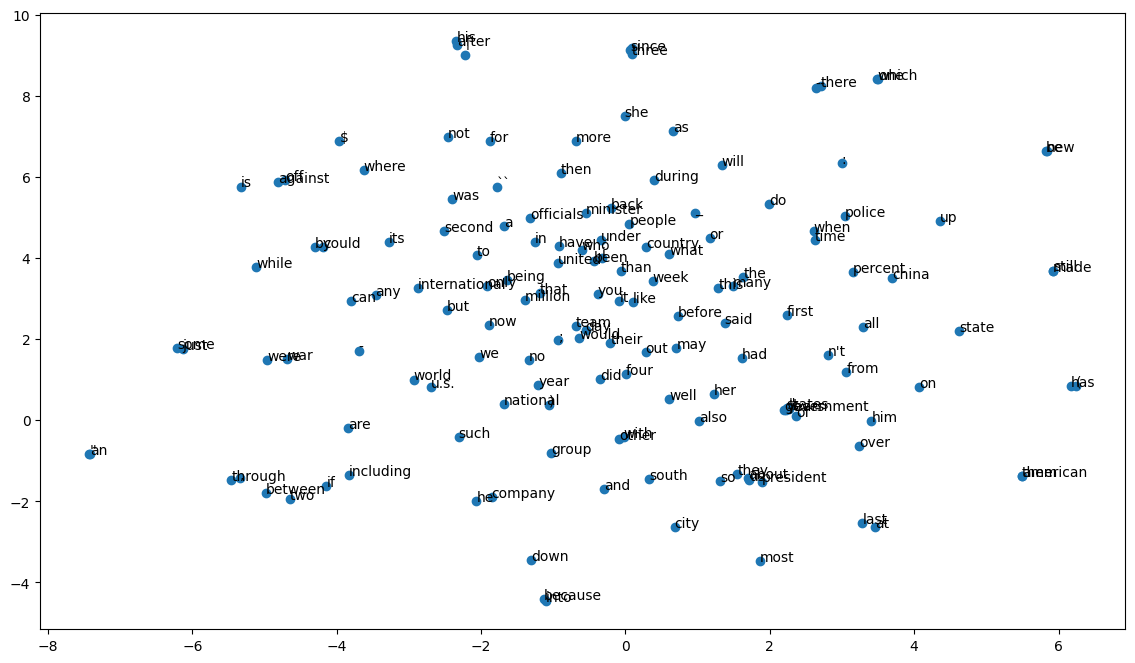

In [11]:
distri = TSNE(n_components=2)
words = list(emmbed_dict.keys())
vectors = np.array([emmbed_dict[word] for word in words])
y = distri.fit_transform(vectors[700:850])
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])

for label,x,y in zip(words,y[:, 0],y[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()